In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

C:\Users\hp\anaconda3\envs\test\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\hp\anaconda3\envs\test\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


# Reading dataset

In [6]:
df=pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [9]:
#checking information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [12]:
#checking null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There is no null values in the dataframe and the feature is numeric feature.

# Distribution of the dataset

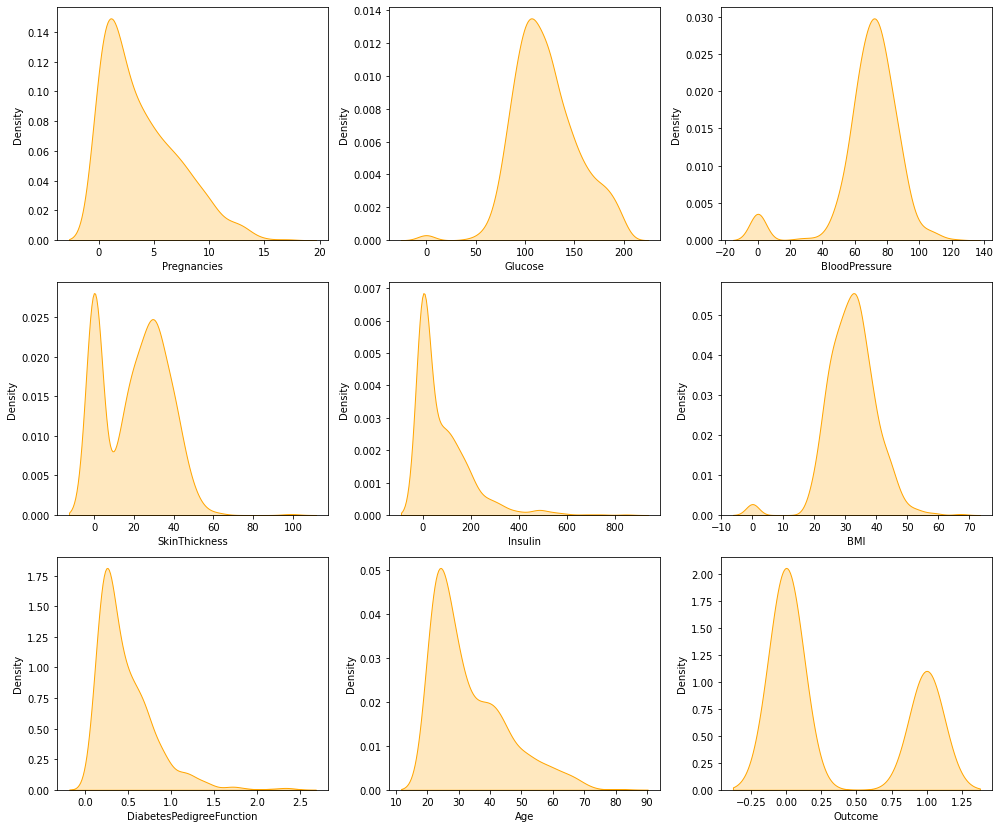

In [13]:
plt.figure(figsize=(14,15))
for i in range(0, len(df.columns)):
    plt.subplot(4,3,i+1)
    sns.kdeplot(x=df[df.columns[i]], shade=True,color='orange',data=df)
    plt.xlabel(df.columns[i])
    plt.tight_layout()

In [14]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [15]:
# Replacing zero values from mean value


In [16]:
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())

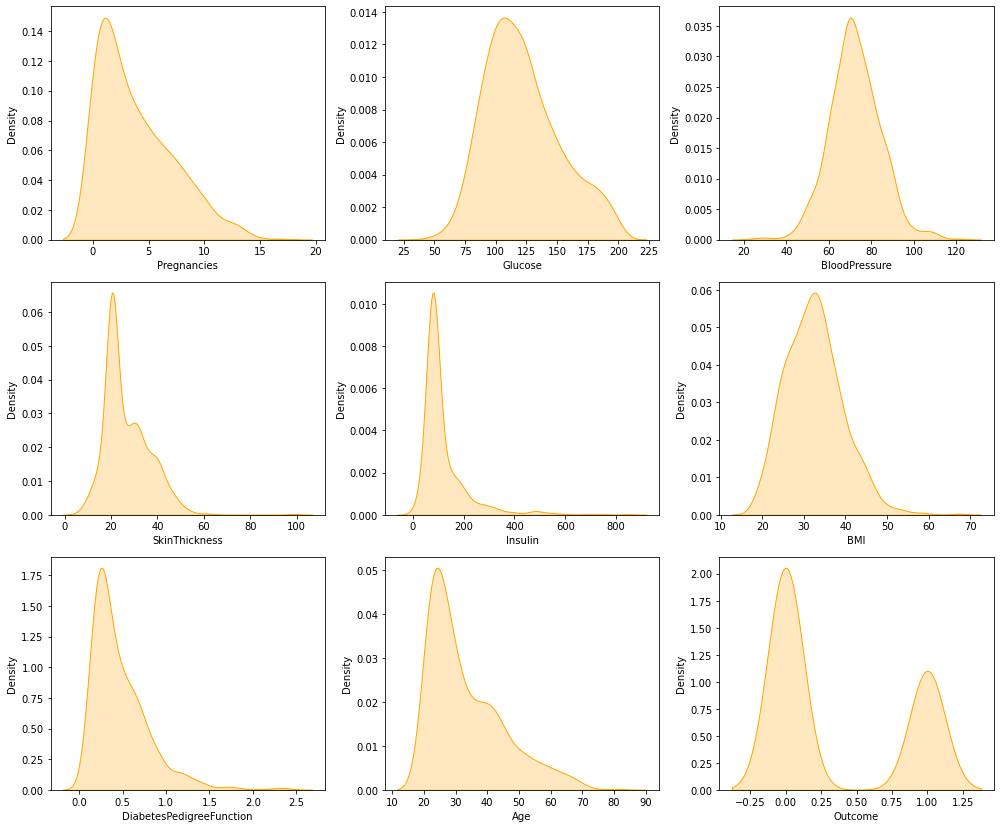

In [17]:
plt.figure(figsize=(14,15))
for i in range(0, len(df.columns)):
    plt.subplot(4,3,i+1)
    sns.kdeplot(x=df[df.columns[i]], shade=True,color='orange',data=df)
    plt.xlabel(df.columns[i])
    plt.tight_layout()

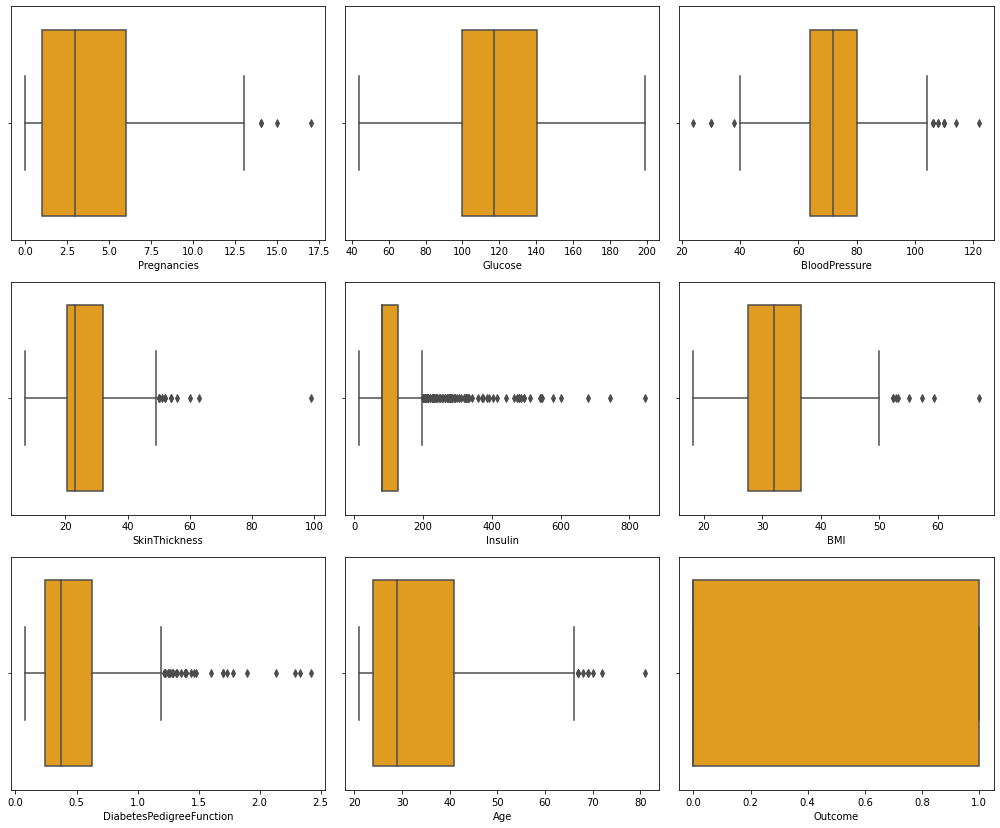

In [18]:
plt.figure(figsize=(14,15))
for i in range(0,len(df.columns)):
    plt.subplot(4,3,i+1)
    sns.boxplot(x=df[df.columns[i]], color='orange')
    plt.tight_layout()

# Outlier Reduction

In [19]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [20]:
q=df['Pregnancies'].quantile(0.98)
data_cleaned=df[df['Pregnancies']<q]

In [21]:
q=df['SkinThickness'].quantile(0.99)
data_cleaned=df[df['SkinThickness']<q]

In [22]:
q=df['BMI'].quantile(0.99)
data_cleaned=df[df['BMI']<q]

In [23]:
q=df['Insulin'].quantile(0.99)
data_cleaned=df[df['Insulin']<q]

In [24]:
q=df['DiabetesPedigreeFunction'].quantile(0.95)
data_cleaned=df[df['DiabetesPedigreeFunction']<q]

In [25]:
q=df['Age'].quantile(0.99)
data_cleaned=df[df['Age']<q]

In [26]:
data_cleaned.shape

(759, 9)

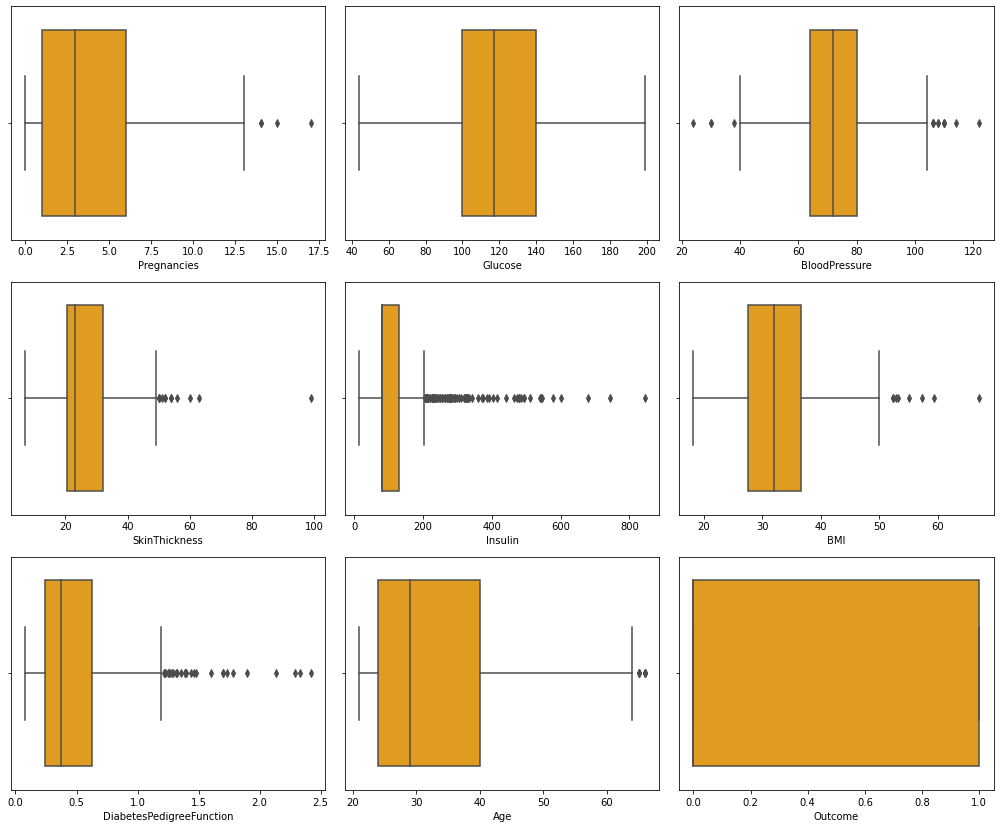

In [27]:
plt.figure(figsize=(14,15))
for i in range(0,len(data_cleaned.columns)):
    plt.subplot(4,3,i+1)
    sns.boxplot(x=data_cleaned[data_cleaned.columns[i]], color='orange')
    plt.tight_layout()

In [28]:
#After removing the outlier Now we are checking the distribution

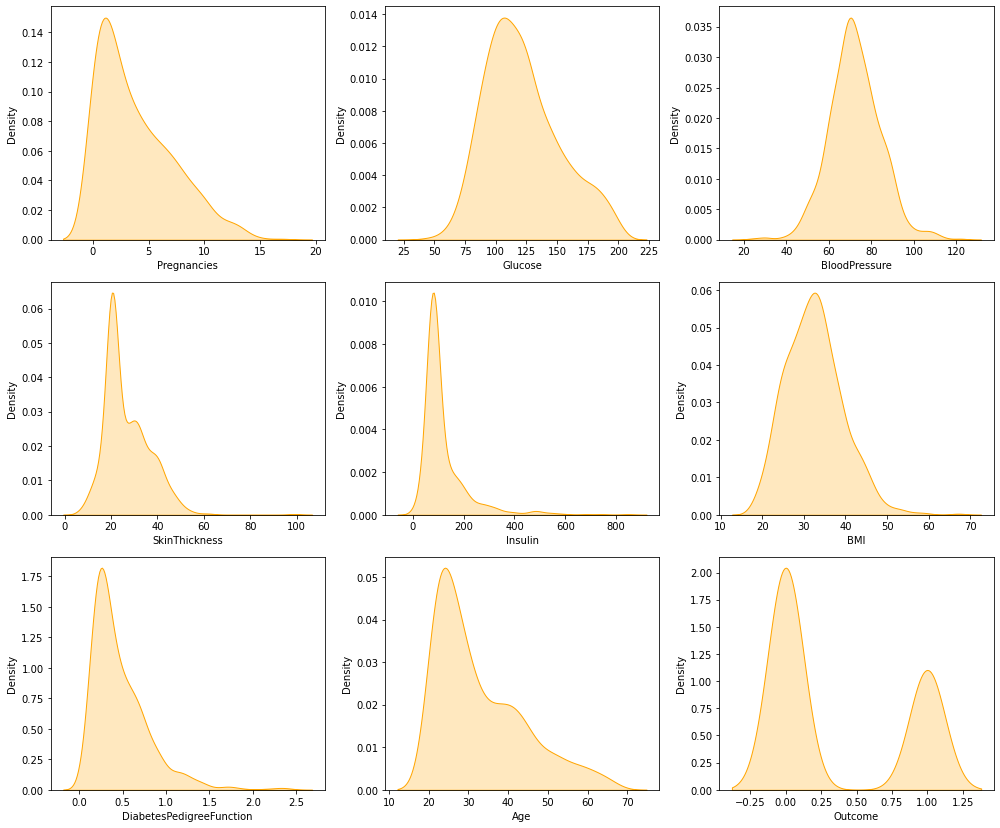

In [29]:
plt.figure(figsize=(14,15))
for i in range(0, len(data_cleaned.columns)):
    plt.subplot(4,3,i+1)
    sns.kdeplot(x=data_cleaned[data_cleaned.columns[i]], shade=True,color='orange',data=df)
    plt.xlabel(data_cleaned.columns[i])
    plt.tight_layout()

From the above plot we can see that we are almost getting normal distribution

In [30]:
# now we are dividing the dataset into dependent and independent variables
X=data_cleaned.drop(columns=['Outcome'])
Y=data_cleaned['Outcome']

In [31]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47


In [32]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 759, dtype: int64

Before training the dataset let visualize the dataset

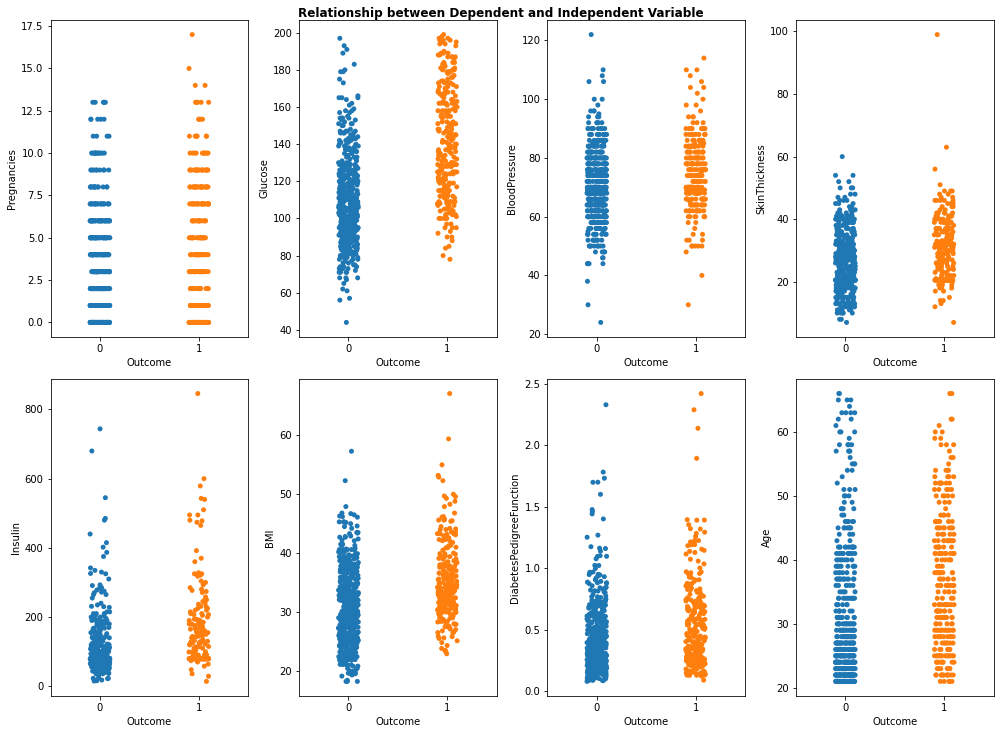

In [33]:
plt.figure(figsize=(14,15))
plt.suptitle('Relationship between Dependent and Independent Variable', fontsize=12, fontweight='bold')
plotnumber=1
for i in X:
    if plotnumber<=9:
        plt.subplot(3,4,plotnumber)
        sns.stripplot(Y,X[i])
    plotnumber+=1
plt.tight_layout()    

In [34]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [35]:
X_scaled =scalar.fit_transform(X)

In [36]:
X_scaled

array([[ 0.64327075,  0.87008298, -0.01698412, ...,  0.16090077,
         0.46879263,  1.54828125],
       [-0.83984741, -1.20656984, -0.51093456, ..., -0.85816238,
        -0.36177415, -0.16252742],
       [ 1.23651801,  2.02377899, -0.6755847 , ..., -1.33857787,
         0.60421113, -0.07248486],
       ...,
       [ 0.34664712, -0.01991109, -0.01698412, ..., -0.91639456,
        -0.68075995, -0.25256998],
       [-0.83984741,  0.14490263, -1.00488499, ..., -0.3486308 ,
        -0.36779275,  1.27815356],
       [-0.83984741, -0.9428679 , -0.18163427, ..., -0.30495667,
        -0.47010895, -0.88286791]])

In [37]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
# separate dataset into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(531, 8) (228, 8)
(531,) (228,)


In [40]:
log.fit(X_train,Y_train)

LogisticRegression()

In [41]:
print(log.coef_)
print(log.intercept_)

[[ 0.13364236  0.0331134  -0.04134018 -0.0035997  -0.00216133  0.06239516
   2.10357158  0.00895698]]
[-5.23485242]


In [42]:
Y_pred = log.predict(X_test)

# Confusion matrix

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [44]:
#Confusion matrix
conf_mat = confusion_matrix(Y_test,Y_pred)
conf_mat

array([[136,  17],
       [ 40,  35]], dtype=int64)

In [45]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [46]:
accuracy = accuracy_score(Y_test,Y_pred)
accuracy

0.75

# Precision

In [47]:
precision = true_positive/(true_positive+false_positive)
precision

0.8888888888888888

# Recall

In [48]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.7727272727272727

# F1 score

In [49]:
F1_Score = 2*(Recall * precision) / (Recall + precision)
F1_Score

0.8267477203647416

# Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [51]:
DTModel=DecisionTreeClassifier()

In [52]:
DTModel.fit(X_train,Y_train)

DecisionTreeClassifier()

In [54]:
DTModel.score(X_train,Y_train)

1.0

In [55]:
y_predict=DTModel.predict(X_test)

In [56]:
accuracy_score(y_predict,Y_test)

0.6798245614035088

In [57]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [59]:
from sklearn.model_selection import GridSearchCV
grid_searh=GridSearchCV(estimator=DTModel,param_grid=grid_param,cv=5)

In [61]:
grid_searh.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [62]:
model_with_best_params=DecisionTreeClassifier(criterion= 'entropy',max_depth= 28,min_samples_leaf= 9,min_samples_split= 2,splitter='random')

In [64]:
model_with_best_params.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=28, min_samples_leaf=9,
                       splitter='random')

In [65]:
y_prediction2=model_with_best_params.predict(X_test)

In [67]:
accuracy_score(Y_test,y_prediction2)

0.7587719298245614